# Aula 6 - Visualização e Story Telling

- [ ] Utilizar 2 técnicas de visualização
	- [ ] Infográfico:
		- [ ] Fazer um infográfico mostrando o perfil das paradas
			- [ ] probabilidade condicional de ser preso por raça
			- [ ] Perfil mais parado
	- [ ] Gráfico:
		- [ ] Fazer um gráfico de pizza mostrando a violation cometida
		- [ ] Fazer um gráfico de pizza mostrando a violation cometida por pessoas presas

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [68]:
csv_path = "../data/police.csv"
df = pd.read_csv(csv_path)

In [69]:
from etl.main import PoliceDatasetEtl

police_dataset_etl = PoliceDatasetEtl(df.copy())
featured_df = police_dataset_etl.clean_transform()

## Infográfico do Perfil das Paradas

Infográfico feito na ferramenta: [venngage](https://infograph.venngage.com/)


#### De onde cada dado foi extraído?


- Quadrante superior esquerdo: [notebook aulas 2 e 3](./etl_aulas_2_e_3.ipynb) 
- Quadrante superior direito: [notebook aulas 2 e 3](./etl_aulas_2_e_3.ipynb) - probabilidade condicional de um motorista ser preso dado que esse é hispânico ou negro.
- Gráfico do meio: dados utilizados no gráfico de pizza abaixo.
- Quadrante inferior esquerdo: gráfico de pizza abaixo.
- Quadrante inferior direito: [notebook aula 5 - análise descritiva](./analise_descritiva_aula_5.ipynb) - distribuições.

![infografico](../visualizacao_aula_5_ifografico.png)

## Gráficos de Violation

In [78]:
violations_df = featured_df.copy()
violations_df.violation = violations_df.violation.fillna("No Violation")
violations_arrested_df = violations_df.copy()
violations_not_arrested_df = violations_df.copy()
violations_arrested_df = violations_arrested_df[
    violations_arrested_df.is_arrested == True
]
violations_not_arrested_df = violations_not_arrested_df[
    violations_not_arrested_df.is_arrested == False
]

violations_grouped = violations_df.groupby("violation").counter.count()
display(violations_grouped)
violations_arrested_grouped = violations_arrested_df.groupby(
    "violation"
).counter.count()
violations_not_arrested_grouped = violations_not_arrested_df.groupby(
    "violation"
).counter.count()

violation
Equipment              11020
Moving violation       16224
No Violation            5333
Other                   4317
Registration/plates     3432
Seat belt               2952
Speeding               48463
Name: counter, dtype: int64

### Violations Que Resultaram em Prisão 🚔

array([[  635, 10385],
       [  910, 15314],
       [  339,  5333],
       [  334,  3978],
       [   74,  3098],
       [  637,  2878]])

7

Text(0.5, 1.0, 'Violations - Arrested')

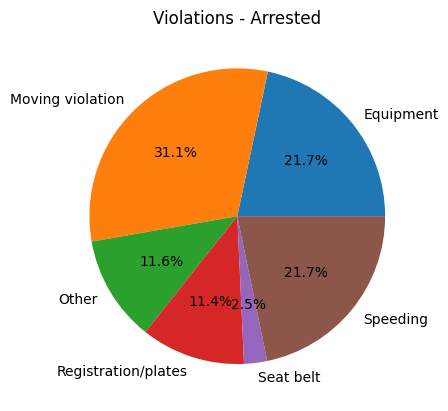

In [77]:
violations_data = np.array(
    [
        [x[0], x[1]]
        for x in zip(
            violations_arrested_grouped.to_list(),
            violations_not_arrested_grouped.to_list(),
        )
    ]
)
violations_label = violations_grouped.index.to_list()
size = len(violations_label)
display(violations_data)
display(size)


plt.pie(
    violations_arrested_grouped.to_list(),
    labels=violations_arrested_grouped.index.to_list(),
    autopct="%1.1f%%",
)
plt.title("Violations - Arrested")

### Violations Que Não Resultaram em Prisão 🆓 

Text(0.5, 1.0, 'Violations - Not Arrested')

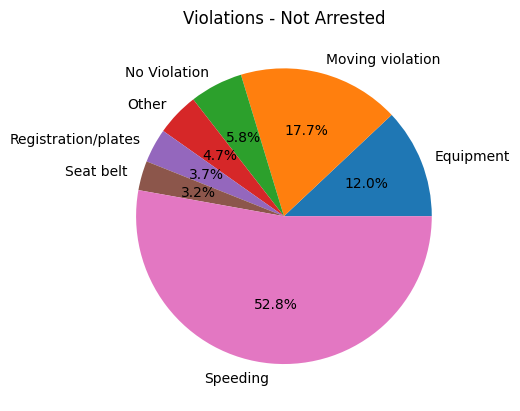

In [76]:
plt.pie(
    violations_grouped.to_list(),
    labels=violations_grouped.index.to_list(),
    autopct="%1.1f%%",
)
plt.title("Violations - Not Arrested")